In [54]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import QuantileTransformer
#from c.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

import seaborn as sns  # pretty plotting, including heat map


import os
from IPython.display import display

from sklearn import preprocessing


AttributeError: module 'pandas' has no attribute 'tslib'

Check current dirctory

In [2]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print('\ndataset dimensions', bank.shape)

# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print('\ndataset shape after dropna', bank.shape)

# look at the list of column names, note that y is the response
list(bank.columns.values)

#bank.head()



dataset dimensions (4521, 17)

dataset shape after dropna (4521, 17)


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

# Basic descriptive statistics

Examine the structure of the DataFrame object

In [3]:
#display(bank.info())
print('\nNumber of  records =', len(bank)) 
#print (bank.info())
# shorten the variable/column names for software preference variables
print('\n Dataset Basic Descriptive Statistics') 
display(bank.describe())

print('\nDataset first 5 records (head)')
display(bank.head())

print('\n Dataset Correlation matrix')
corr_matrix= bank.corr()
#display(corr_matrix["Default"].sort_values(ascending=False))





Number of  records = 4521

 Dataset Basic Descriptive Statistics


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000



Dataset first 5 records (head)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



 Dataset Correlation matrix


# Visualize dataset

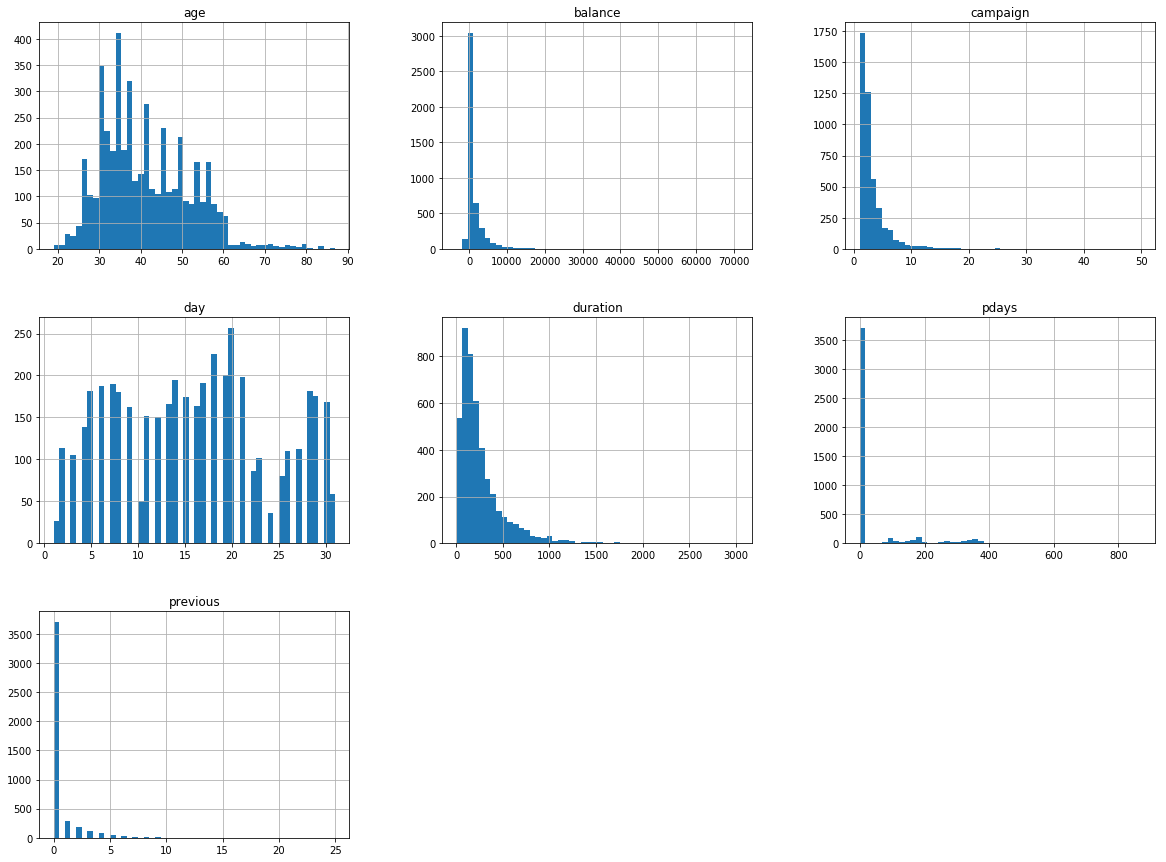

In [4]:
bank.hist( bins=50 , figsize=(20,15))
plt.show()

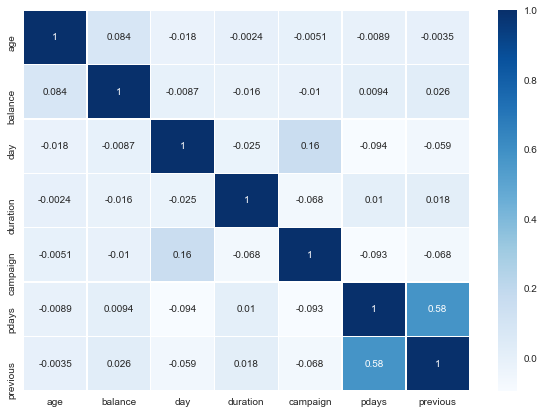

In [12]:
fig, ax = plt.subplots(figsize=(10,7)) # Sample figsize in inches

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, 
        annot=True, linewidths=.5, ax=ax ,  cmap="Blues")

# Transformation

In [6]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
# print(model_data.shape)


In [7]:
print('\nresponse',pd.factorize(bank['default'].values))
print('\ndefault',pd.factorize(bank['default'].values))
print('\nloan',pd.factorize(bank['loan'].values))
print('\nhousing',pd.factorize(bank['housing'].values))
le = preprocessing.LabelEncoder()

bank['response_ind'] = le.fit_transform(bank['response'].astype(str))
bank['default_ind'] = le.fit_transform(bank['default'].astype(str))
bank['loan_ind'] = le.fit_transform(bank['loan'].astype(str))
bank['housing_ind'] = le.fit_transform(bank['housing'].astype(str))

bank.head(3)


response (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array(['no', 'yes'], dtype=object))

default (array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array(['no', 'yes'], dtype=object))

loan (array([0, 1, 0, ..., 0, 0, 1], dtype=int64), array(['no', 'yes'], dtype=object))

housing (array([0, 1, 1, ..., 0, 0, 1], dtype=int64), array(['no', 'yes'], dtype=object))


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,response_ind,default_ind,loan_ind,housing_ind
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,0,0,1,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,0,0,0,1


In [8]:
log_reg = LogisticRegression()
Y=bank['response_ind']
X = bank[['default_ind','loan_ind','housing_ind']]

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

display(X_train.head())
log_reg.fit(X_train,Y_train)

print('\nLogistic Regression score' ,log_reg.score(X_train, Y_train))

print('\nLogistic Regression coefficients')

predictors = X_train.columns

log_reg.coef_[0,:]
#pd.Series(log_reg.coef_)
coef = pd.Series(log_reg.coef_[0,:],predictors).sort_values()

print(coef)



,default_ind,loan_ind,housing_ind
4383,0,0,0
502,0,0,0
4052,0,0,1
3634,0,1,1
3088,0,0,0



Logistic Regression score 0.886891592920354

Logistic Regression coefficients
loan_ind      -0.894343
housing_ind   -0.642330
default_ind    0.309743
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
y_lr_prob = log_reg.predict_proba(x_test)
y_lr_predict = log_reg.predict(x_test)
#print(y_lr_predict)
#y_test

prob=y_lr_prob[:,1]
#print(len(y_lr_predict))
print("Accuracy:",metrics.accuracy_score(y_test, y_lr_predict))

prob
#%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 6)

#plt.plot(y_lr_predict, label='Predicted')
#plt.plot(y_test.values, label='Actual')
#plt.ylabel('Response')

#plt.legend()
#plt.show()

#plt.plot(x_test, y_lr_predict[:,1],"g-" , label="subscribed to a term deposit" )
#plt.plot(x_test, y_lr_predict[:,0],"b--" , label="Did not subscribed to a term deposit" )


Accuracy: 0.876243093922652


array([0.0929227 , 0.0929227 , 0.0929227 , 0.04020214, 0.0929227 ,
       0.0737494 , 0.16299242, 0.16299242, 0.16299242, 0.16299242,
       0.16299242, 0.0929227 , 0.16299242, 0.0929227 , 0.04020214,
       0.0929227 , 0.0737494 , 0.0929227 , 0.16299242, 0.0929227 ,
       0.0737494 , 0.0929227 , 0.0737494 , 0.16299242, 0.16299242,
       0.0929227 , 0.16299242, 0.16299242, 0.0929227 , 0.04020214,
       0.16299242, 0.0929227 , 0.0929227 , 0.0929227 , 0.0929227 ,
       0.16299242, 0.12252681, 0.16299242, 0.0929227 , 0.16299242,
       0.16299242, 0.04020214, 0.0929227 , 0.0737494 , 0.0929227 ,
       0.16299242, 0.16299242, 0.0929227 , 0.0929227 , 0.16299242,
       0.04020214, 0.0929227 , 0.0737494 , 0.16299242, 0.0737494 ,
       0.16299242, 0.0929227 , 0.20975776, 0.16299242, 0.0929227 ,
       0.16299242, 0.04020214, 0.0929227 , 0.16299242, 0.16299242,
       0.16299242, 0.16299242, 0.0929227 , 0.16299242, 0.16299242,
       0.05401018, 0.16299242, 0.0737494 , 0.16299242, 0.09292

Confusion matrix:
 [[793   0]
 [112   0]]
Training accuracy: 87.6243 %
Training AUC: 58.4517 %


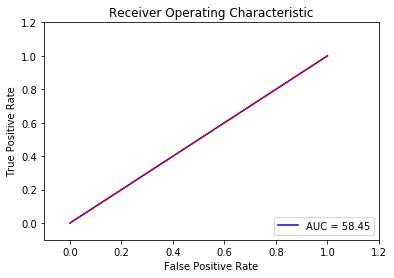

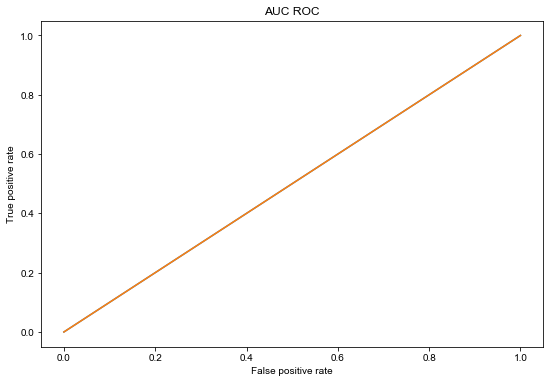

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_lr_predict)
 
test_accuracy = accuracy_score(y_test, y_lr_predict)*100
test_auc_roc = metrics.roc_auc_score(y_test, prob)*100
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_lr_predict))
print('Training accuracy: %.4f %%' % test_accuracy)
print('Training AUC: %.4f %%' % test_auc_roc)    


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% test_auc_roc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')
 
plt.savefig('auc_roc.png', dpi=600)





In [20]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, Y_train)

#Predict the response for test dataset
y_gnb_pred = gnb.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_gnb_pred))

test_accuracy = accuracy_score(y_test, y_gnb_pred)*100
#test_auc_roc = metrics.roc_auc_score(y_test, prob)*100

print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_gnb_pred))
print('Training accuracy: %.4f %%' % test_accuracy)
#print('Training AUC: %.4f %%' % test_auc_roc)    
len(y_gnb_pred)
print('\nNaives score' ,gnb.score(X_train, Y_train))

Accuracy: 0.8629834254143647
Confusion matrix:
 [[779  14]
 [110   2]]
Training accuracy: 86.2983 %

Naives score 0.8799778761061947


Training AUC: 0.5001 %


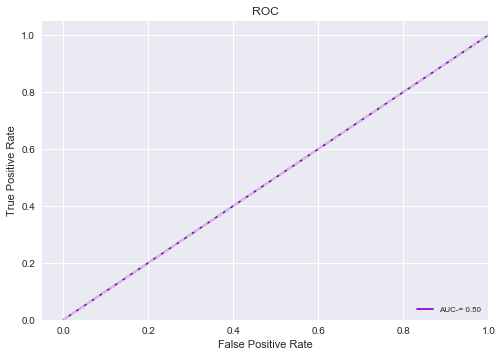

In [55]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_gnb_pred.reshape(905,-1))

roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
print('Training AUC: %.4f %%' % roc_auc) 
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen',
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
            
color = colorSet[3]

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('AUC-= %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show()
# Save ROC graphs
plt.savefig('TESTROCXXX.jpg')


In [47]:
y_gnb_pred.reshape(905,-1)


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

4274    0
72      0
1065    0
3185    0
130     0
2033    1
1098    0
2217    0
2319    0
1504    1
2010    0
2108    0
154     0
3166    0
3196    0
942     0
1738    0
567     0
410     0
2842    0
2550    0
1343    1
3339    0
3044    0
269     0
1533    0
3030    0
873     0
1571    0
2164    0
       ..
39      0
2673    0
1888    0
939     0
398     0
2951    0
538     0
2409    0
3703    0
3374    0
2049    1
3704    0
1326    0
2714    0
3857    0
995     0
3836    0
1160    0
2030    0
1005    0
621     0
3121    0
4185    0
1246    0
30      1
1523    0
2591    0
1224    0
3071    0
1680    1
Name: response_ind, Length: 905, dtype: int32